# Analisis Dynamic Time Warping (DTW) pada Dataset Suara

Notebook ini melakukan analisis DTW pada dataset suara untuk menghitung jarak antar sinyal audio dan memvisualisasikan jalur optimal alignment.

## 1. Import Libraries

In [17]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
import os
from scipy.spatial.distance import euclidean, cdist
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10

print('✓ Libraries imported successfully!')

✓ Libraries imported successfully!


## 2. Load Dataset Audio

In [18]:
# Path dataset
DATASET_PATH = r"c:\Users\achma\OneDrive\Documents\1Semester 5\PSD\speaker_datasets"

# Load semua file audio
audio_files = []
audio_signals = []
sample_rates = []

print(f"Loading audio files from: {DATASET_PATH}\n")

# Cari semua file .wav
for root, dirs, files in os.walk(DATASET_PATH):
    for file in files:
        if file.endswith('.wav'):
            file_path = os.path.join(root, file)
            try:
                # Load audio file
                y, sr = librosa.load(file_path, sr=None)
                audio_files.append(file)
                audio_signals.append(y)
                sample_rates.append(sr)
                print(f"✓ Loaded: {file} | Length: {len(y)} samples | SR: {sr} Hz")
            except Exception as e:
                print(f"✗ Error loading {file}: {str(e)}")

print(f"\nTotal files loaded: {len(audio_files)}")

Loading audio files from: c:\Users\achma\OneDrive\Documents\1Semester 5\PSD\speaker_datasets

✓ Loaded: Buka1.wav | Length: 114240 samples | SR: 48000 Hz
✓ Loaded: Buka10.wav | Length: 102720 samples | SR: 48000 Hz
✓ Loaded: Buka11.wav | Length: 142080 samples | SR: 48000 Hz
✓ Loaded: Buka12.wav | Length: 128640 samples | SR: 48000 Hz
✓ Loaded: Buka13.wav | Length: 122880 samples | SR: 48000 Hz
✓ Loaded: Buka14.wav | Length: 134400 samples | SR: 48000 Hz
✓ Loaded: Buka15.wav | Length: 122880 samples | SR: 48000 Hz
✓ Loaded: Buka16.wav | Length: 149760 samples | SR: 48000 Hz
✓ Loaded: Buka17.wav | Length: 115200 samples | SR: 48000 Hz
✓ Loaded: Buka18.wav | Length: 130560 samples | SR: 48000 Hz
✓ Loaded: Buka19.wav | Length: 151680 samples | SR: 48000 Hz
✓ Loaded: Buka2.wav | Length: 133440 samples | SR: 48000 Hz
✓ Loaded: Buka20.wav | Length: 118080 samples | SR: 48000 Hz
✓ Loaded: Buka21.wav | Length: 129600 samples | SR: 48000 Hz
✓ Loaded: Buka22.wav | Length: 115200 samples | SR: 48

## 3. Analisis Panjang Sinyal

In [19]:
# Buat dataframe untuk analisis
signal_info = pd.DataFrame({
    'Filename': audio_files,
    'Length (samples)': [len(sig) for sig in audio_signals],
    'Duration (seconds)': [len(sig)/sr for sig, sr in zip(audio_signals, sample_rates)],
    'Sample Rate (Hz)': sample_rates
})

print("\n" + "="*80)
print("INFORMASI SINYAL AUDIO")
print("="*80)
print(signal_info.to_string(index=False))
print("\n" + "="*80)
print("STATISTIK")
print("="*80)
print(signal_info.describe())


INFORMASI SINYAL AUDIO
             Filename  Length (samples)  Duration (seconds)  Sample Rate (Hz)
            Buka1.wav            114240                2.38             48000
           Buka10.wav            102720                2.14             48000
           Buka11.wav            142080                2.96             48000
           Buka12.wav            128640                2.68             48000
           Buka13.wav            122880                2.56             48000
           Buka14.wav            134400                2.80             48000
           Buka15.wav            122880                2.56             48000
           Buka16.wav            149760                3.12             48000
           Buka17.wav            115200                2.40             48000
           Buka18.wav            130560                2.72             48000
           Buka19.wav            151680                3.16             48000
            Buka2.wav            133440 

## 4. Visualisasi Sinyal Audio (Plot Garis)

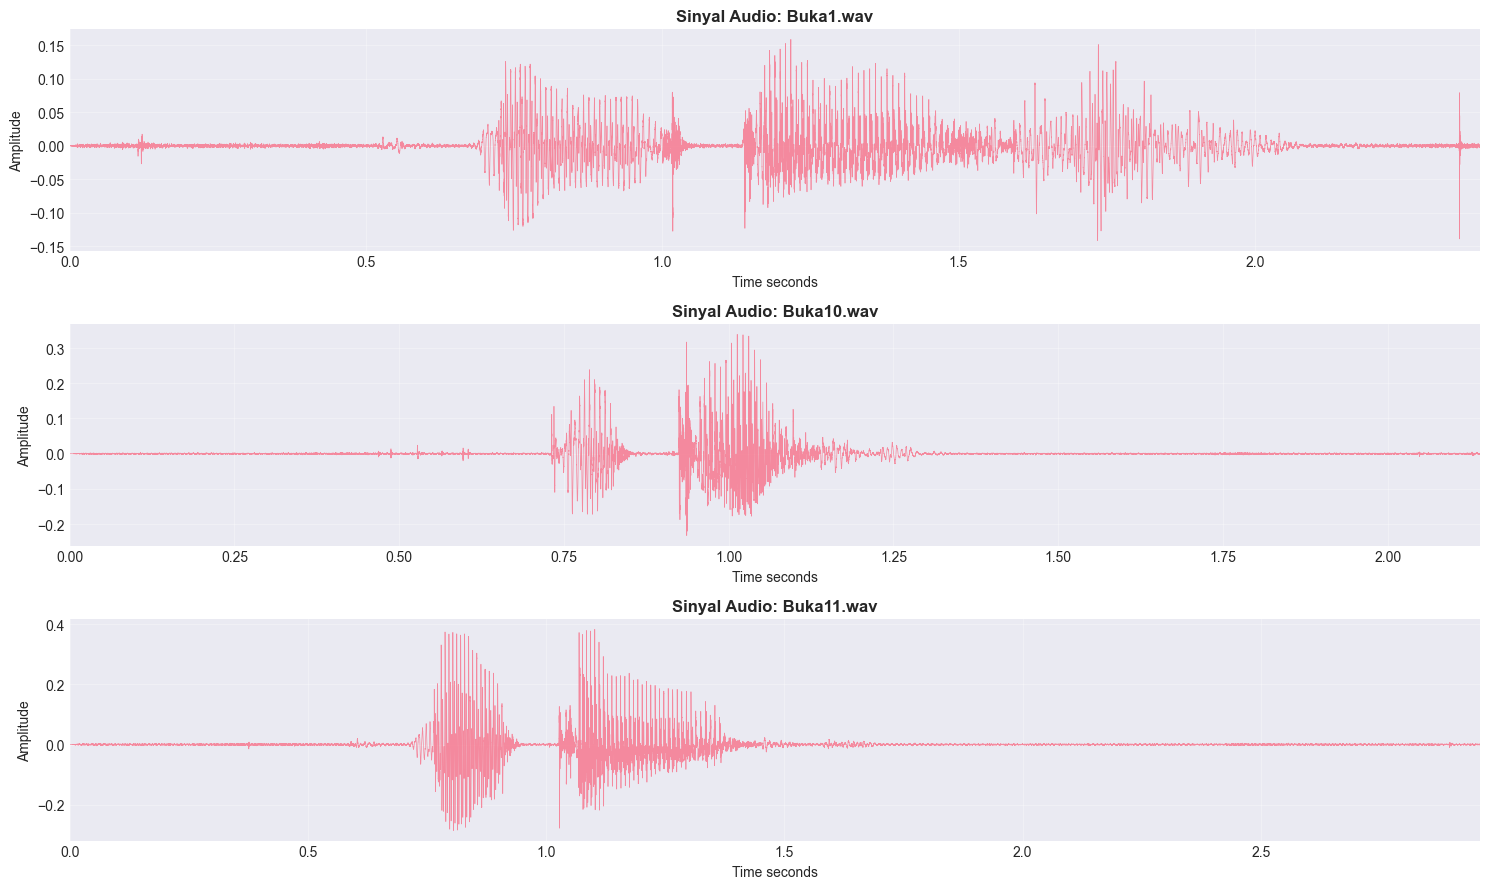

Visualisasi lima sinyal audio selesai


In [20]:
top_n = 3
n_signals = min(len(audio_signals), top_n)

fig, axes = plt.subplots(n_signals, 1, figsize=(15, 3*n_signals))

if n_signals == 1:
    axes = [axes]

for idx, (signal, filename, sr) in enumerate(zip(audio_signals[:top_n], audio_files[:top_n], sample_rates[:top_n])):
    time = np.arange(len(signal)) / sr
    axes[idx].plot(time, signal, linewidth=0.5, alpha=0.8)
    axes[idx].set_title(f'Sinyal Audio: {filename}', fontweight='bold', fontsize=12)
    axes[idx].set_xlabel('Time seconds')
    axes[idx].set_ylabel('Amplitude')
    axes[idx].grid(True, alpha=0.3)
    axes[idx].set_xlim(0, max(time))

plt.tight_layout()
plt.savefig('01_audio_signals_top5.png', dpi=300, bbox_inches='tight')
plt.show()

print("Visualisasi lima sinyal audio selesai")


## 5. Ekstraksi Fitur MFCC

In [21]:
# Ekstrak MFCC untuk setiap sinyal
mfcc_features = []
n_mfcc = 13  # Jumlah koefisien MFCC

print("Extracting MFCC features...\n")

for idx, (signal, filename, sr) in enumerate(zip(audio_signals, audio_files, sample_rates)):
    # Ekstrak MFCC
    mfcc = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=n_mfcc)
    # Transpose agar shape menjadi (time_frames, n_mfcc)
    mfcc = mfcc.T
    mfcc_features.append(mfcc)
    print(f"✓ {filename}: MFCC shape = {mfcc.shape}")

print(f"\n✓ MFCC extraction complete! Using {n_mfcc} coefficients.")

Extracting MFCC features...

✓ Buka1.wav: MFCC shape = (224, 13)
✓ Buka10.wav: MFCC shape = (201, 13)
✓ Buka11.wav: MFCC shape = (278, 13)
✓ Buka12.wav: MFCC shape = (252, 13)
✓ Buka13.wav: MFCC shape = (241, 13)
✓ Buka14.wav: MFCC shape = (263, 13)
✓ Buka15.wav: MFCC shape = (241, 13)
✓ Buka16.wav: MFCC shape = (293, 13)
✓ Buka17.wav: MFCC shape = (226, 13)
✓ Buka18.wav: MFCC shape = (256, 13)
✓ Buka19.wav: MFCC shape = (297, 13)
✓ Buka2.wav: MFCC shape = (261, 13)
✓ Buka20.wav: MFCC shape = (231, 13)
✓ Buka21.wav: MFCC shape = (254, 13)
✓ Buka22.wav: MFCC shape = (226, 13)
✓ Buka23.wav: MFCC shape = (241, 13)
✓ Buka24.wav: MFCC shape = (252, 13)
✓ Buka25.wav: MFCC shape = (289, 13)
✓ Buka26.wav: MFCC shape = (246, 13)
✓ Buka27.wav: MFCC shape = (220, 13)
✓ Buka28.wav: MFCC shape = (256, 13)
✓ Buka29.wav: MFCC shape = (212, 13)
✓ Buka3.wav: MFCC shape = (267, 13)
✓ Buka30.wav: MFCC shape = (233, 13)
✓ Buka31.wav: MFCC shape = (286, 13)
✓ Buka32.wav: MFCC shape = (248, 13)
✓ Buka33.wav

## 6. Visualisasi MFCC

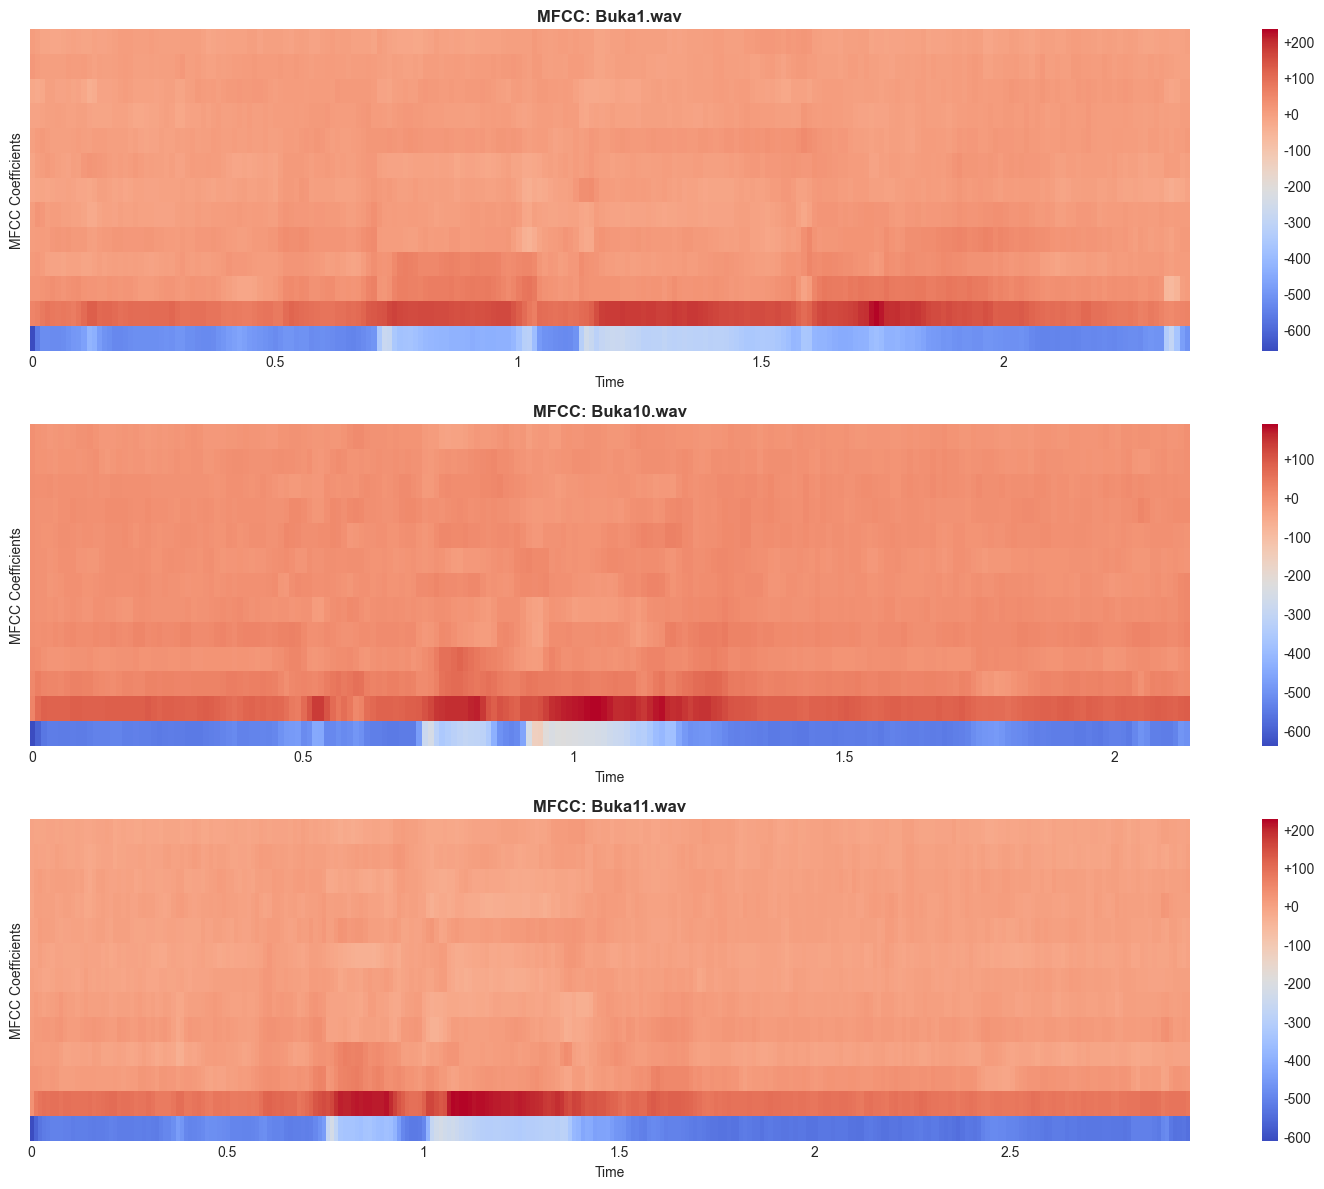

✓ Visualisasi MFCC selesai!


In [22]:
# Visualisasi MFCC untuk setiap sinyal (hanya plotting n_signals teratas)
fig, axes = plt.subplots(n_signals, 1, figsize=(15, 4*n_signals))

if n_signals == 1:
    axes = [axes]

for idx, (mfcc, filename, sr) in enumerate(zip(mfcc_features[:n_signals], audio_files[:n_signals], sample_rates[:n_signals])):
    img = librosa.display.specshow(mfcc.T, x_axis='time', sr=sr, ax=axes[idx], cmap='coolwarm')
    axes[idx].set_title(f'MFCC: {filename}', fontweight='bold', fontsize=12)
    axes[idx].set_ylabel('MFCC Coefficients')
    fig.colorbar(img, ax=axes[idx], format='%+2.0f')

plt.tight_layout()
plt.savefig('02_mfcc_features.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Visualisasi MFCC selesai!")

## 7. Perhitungan DTW - Matriks Jarak (M) dan Matriks Kumulatif (C)

In [23]:
# Pilih dua sinyal pertama untuk analisis DTW detail
if len(mfcc_features) >= 2:
    signal1 = mfcc_features[0]
    signal2 = mfcc_features[1]
    name1 = audio_files[0]
    name2 = audio_files[1]
else:
    # Jika hanya 1 sinyal, bandingkan dengan versi yang di-downsample
    signal1 = mfcc_features[0]
    signal2 = mfcc_features[0][::2]  # Ambil setiap 2 frame
    name1 = audio_files[0]
    name2 = audio_files[0] + " (downsampled)"

print(f"\nPerbandingan DTW antara:")
print(f"  Signal 1: {name1} (shape: {signal1.shape})")
print(f"  Signal 2: {name2} (shape: {signal2.shape})")
print("\nComputing DTW...")


Perbandingan DTW antara:
  Signal 1: Buka1.wav (shape: (224, 13))
  Signal 2: Buka10.wav (shape: (201, 13))

Computing DTW...


In [24]:
# Install dtw-python if not already installed
%pip install dtw-python

# Hitung DTW menggunakan dtw-python library
# Library ini mengembalikan distance, cost_matrix, accumulated_cost_matrix, dan path
from dtw import dtw

# Hitung DTW dengan euclidean distance
alignment = dtw(signal1, signal2, keep_internals=True)

dtw_distance = alignment.distance
cost_matrix = alignment.costMatrix  # Matriks jarak M
accumulated_cost = alignment.costMatrix  # Matriks kumulatif C
path = list(zip(alignment.index1, alignment.index2))  # Path optimal

print(f"\n✓ DTW Distance: {dtw_distance:.4f}")
print(f"✓ Cost Matrix shape: {cost_matrix.shape}")
print(f"✓ Path length: {len(path)} steps")

  Using cached numpy-2.2.6-cp310-cp310-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.2.6-cp310-cp310-win_amd64.whl (12.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
Note: you may need to restart the kernel to use updated packages.

✓ DTW Distance: 18668.1896
✓ Cost Matrix shape: (224, 201)
✓ Path length: 389 steps


error: uninstall-no-record-file

× Cannot uninstall numpy 1.26.4
╰─> The package's contents are unknown: no RECORD file was found for numpy.

hint: You might be able to recover from this via: pip install --force-reinstall --no-deps numpy==1.26.4


## 8. Visualisasi Matriks Jarak (M)

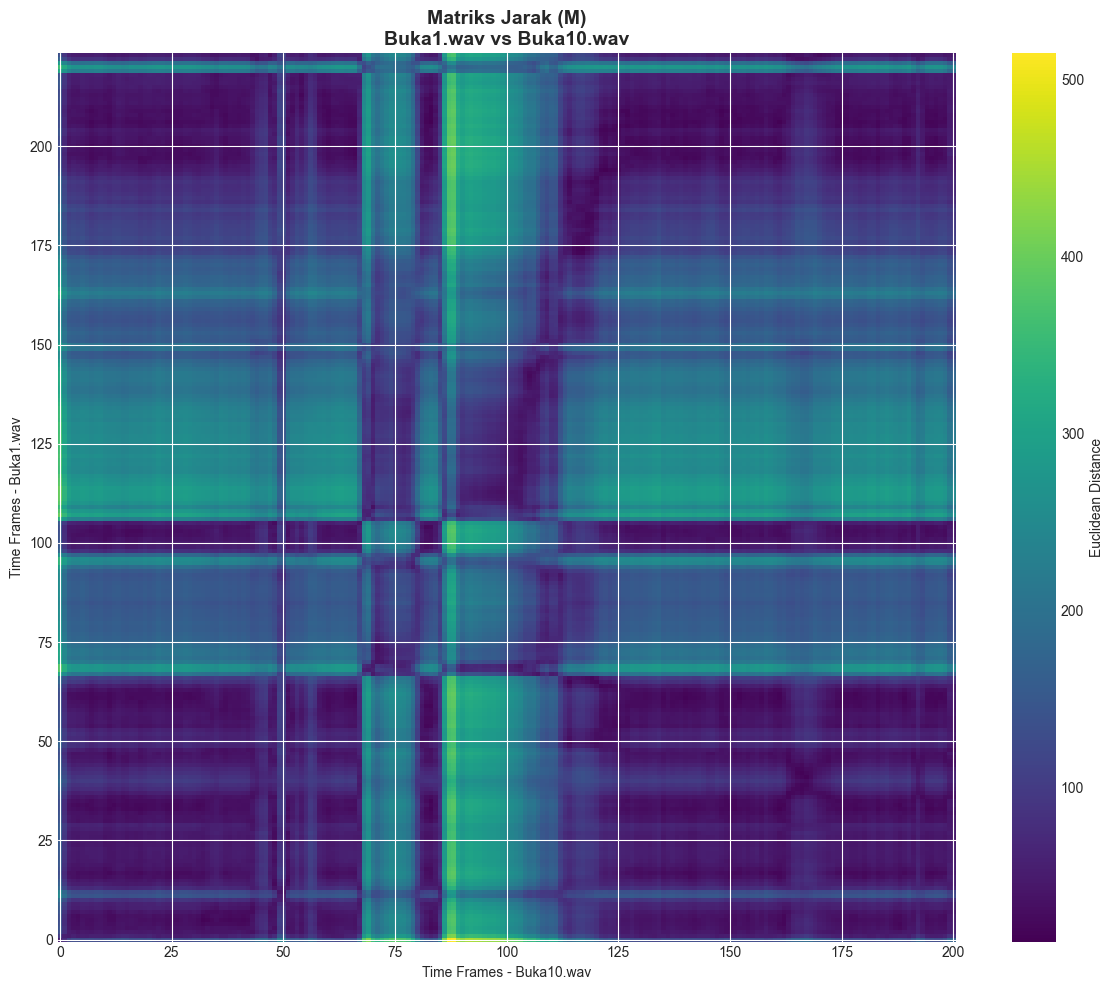

✓ Matriks Jarak shape: (224, 201)
  Min distance: 12.6182
  Max distance: 515.0220
  Mean distance: 136.5805


In [25]:
# Hitung matriks jarak Euclidean
from scipy.spatial.distance import cdist

distance_matrix = cdist(signal1, signal2, metric='euclidean')

# Plot matriks jarak M
plt.figure(figsize=(12, 10))
plt.imshow(distance_matrix, cmap='viridis', aspect='auto', origin='lower', interpolation='nearest')
plt.colorbar(label='Euclidean Distance')
plt.title(f'Matriks Jarak (M)\n{name1} vs {name2}', fontweight='bold', fontsize=14)
plt.xlabel(f'Time Frames - {name2}')
plt.ylabel(f'Time Frames - {name1}')
plt.tight_layout()
plt.savefig('03_distance_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"✓ Matriks Jarak shape: {distance_matrix.shape}")
print(f"  Min distance: {distance_matrix.min():.4f}")
print(f"  Max distance: {distance_matrix.max():.4f}")
print(f"  Mean distance: {distance_matrix.mean():.4f}")

## 9. Visualisasi Matriks Kumulatif (C)

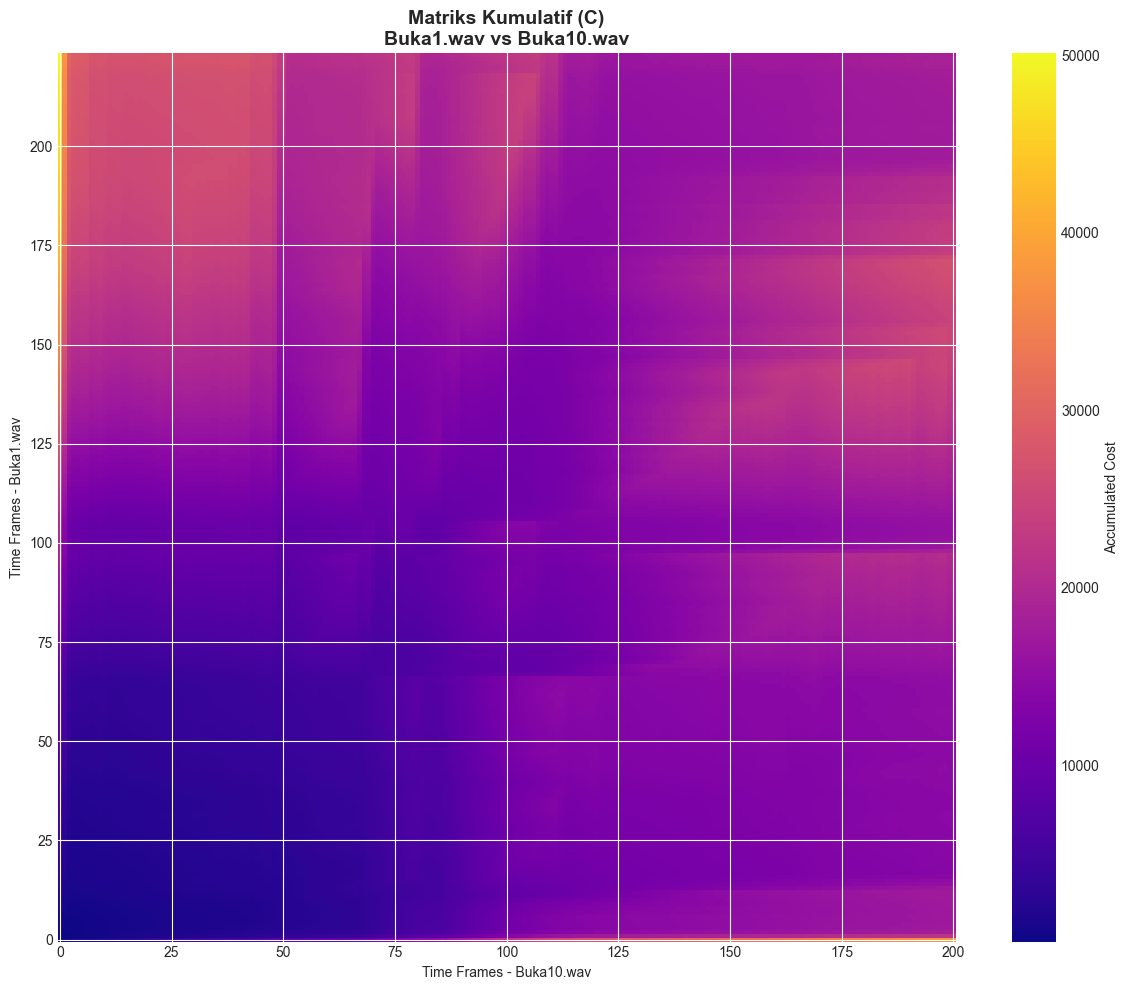

✓ Matriks Kumulatif shape: (224, 201)
  Final accumulated cost: 18668.1896


In [26]:
# Plot matriks kumulatif C
plt.figure(figsize=(12, 10))
plt.imshow(accumulated_cost, cmap='plasma', aspect='auto', origin='lower', interpolation='nearest')
plt.colorbar(label='Accumulated Cost')
plt.title(f'Matriks Kumulatif (C)\n{name1} vs {name2}', fontweight='bold', fontsize=14)
plt.xlabel(f'Time Frames - {name2}')
plt.ylabel(f'Time Frames - {name1}')
plt.tight_layout()
plt.savefig('04_accumulated_cost_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"✓ Matriks Kumulatif shape: {accumulated_cost.shape}")
print(f"  Final accumulated cost: {accumulated_cost[-1, -1]:.4f}")

## 10. Visualisasi Jalur Optimal DTW

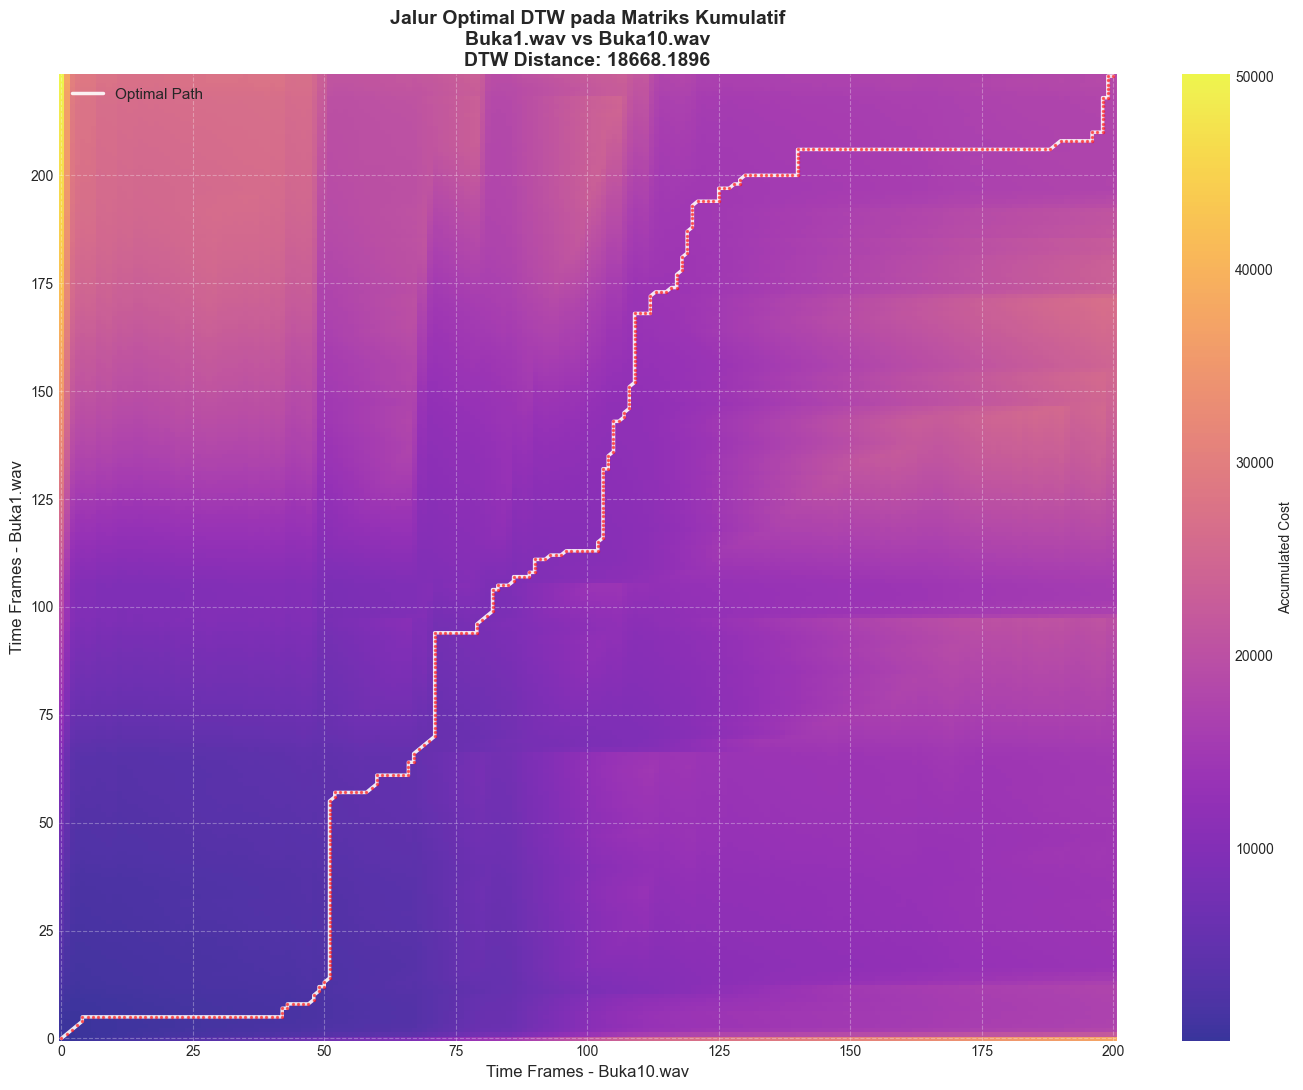


✓ Jalur optimal terdiri dari 389 langkah
✓ DTW Distance: 18668.1896


In [27]:
# Plot jalur optimal pada matriks kumulatif
plt.figure(figsize=(14, 11))
plt.imshow(accumulated_cost, cmap='plasma', aspect='auto', origin='lower', interpolation='nearest', alpha=0.8)
plt.colorbar(label='Accumulated Cost')

# Plot path
path_array = np.array(path)
plt.plot(path_array[:, 1], path_array[:, 0], 'w-', linewidth=2.5, label='Optimal Path', alpha=0.9)
plt.plot(path_array[:, 1], path_array[:, 0], 'r.', markersize=3, alpha=0.5)

plt.title(f'Jalur Optimal DTW pada Matriks Kumulatif\n{name1} vs {name2}\nDTW Distance: {dtw_distance:.4f}', 
          fontweight='bold', fontsize=14)
plt.xlabel(f'Time Frames - {name2}', fontsize=12)
plt.ylabel(f'Time Frames - {name1}', fontsize=12)
plt.legend(loc='upper left', fontsize=11)
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.savefig('05_dtw_optimal_path.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n✓ Jalur optimal terdiri dari {len(path)} langkah")
print(f"✓ DTW Distance: {dtw_distance:.4f}")

## 11. Visualisasi Alignment Sinyal

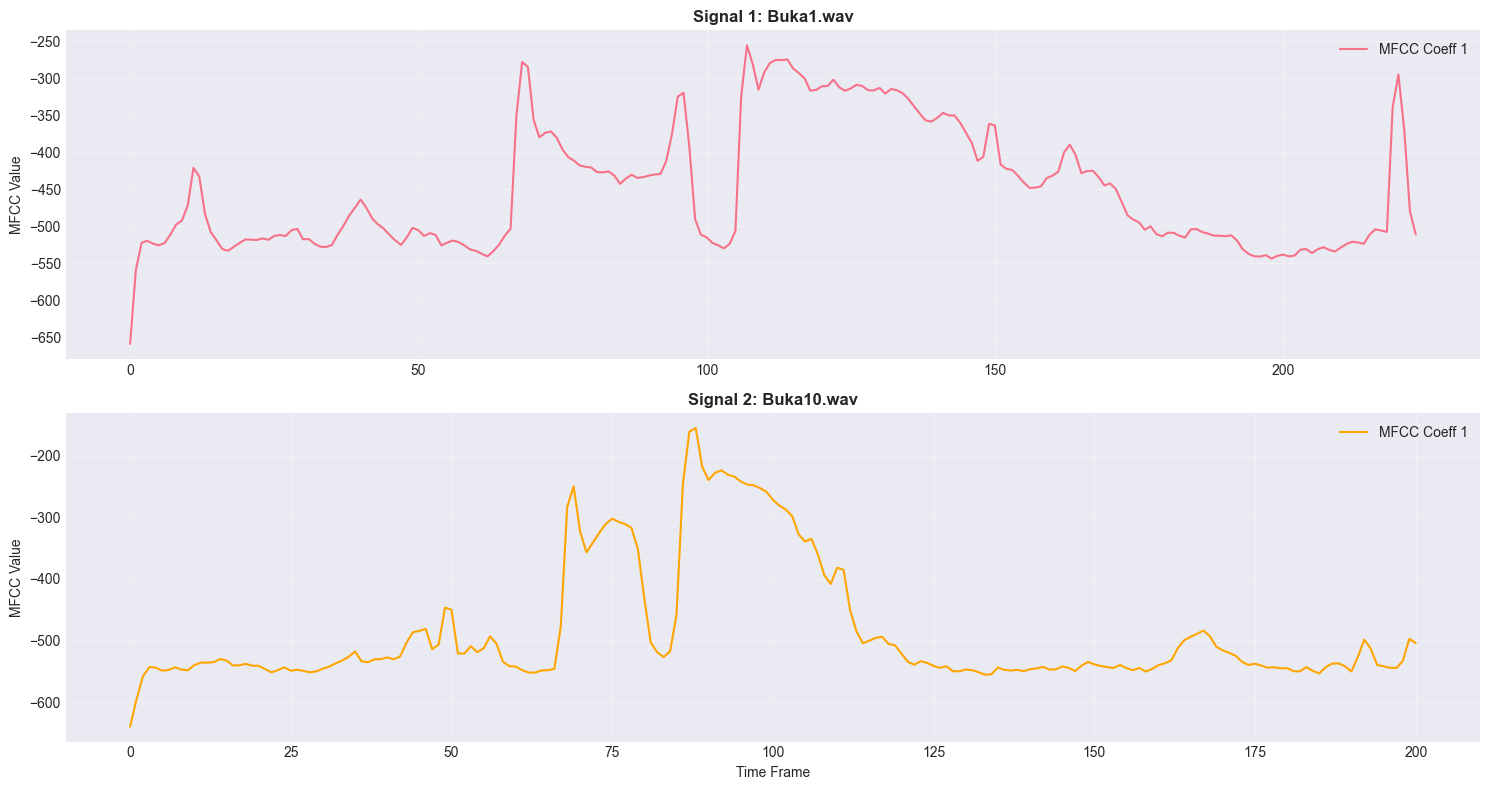

✓ Visualisasi alignment selesai!


In [28]:
# Plot alignment antara dua sinyal
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 8))

# Plot signal 1
ax1.plot(signal1[:, 0], label='MFCC Coeff 1', linewidth=1.5)
ax1.set_title(f'Signal 1: {name1}', fontweight='bold')
ax1.set_ylabel('MFCC Value')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot signal 2
ax2.plot(signal2[:, 0], label='MFCC Coeff 1', linewidth=1.5, color='orange')
ax2.set_title(f'Signal 2: {name2}', fontweight='bold')
ax2.set_xlabel('Time Frame')
ax2.set_ylabel('MFCC Value')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('06_signal_alignment.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Visualisasi alignment selesai!")

## 12. Matriks Jarak DTW untuk Semua Pasangan Sinyal

In [30]:
# Hitung DTW distance untuk semua pasangan sinyal
n_signals = len(mfcc_features)
dtw_matrix = np.zeros((n_signals, n_signals))

print("Computing DTW distances for all pairs...\n")

for i in range(n_signals):
    for j in range(n_signals):
        if i == j:
            dtw_matrix[i, j] = 0
        elif i < j:
            # Hitung DTW
            alignment = dtw(mfcc_features[i], mfcc_features[j])
            dtw_matrix[i, j] = alignment.distance
            dtw_matrix[j, i] = alignment.distance
            print(f"✓ DTW({audio_files[i]}, {audio_files[j]}): {alignment.distance:.4f}")

print("\n✓ DTW matrix computation complete!")

Computing DTW distances for all pairs...

✓ DTW(Buka1.wav, Buka10.wav): 18668.1896
✓ DTW(Buka1.wav, Buka11.wav): 20872.0424
✓ DTW(Buka1.wav, Buka12.wav): 20575.1244
✓ DTW(Buka1.wav, Buka13.wav): 19359.9604
✓ DTW(Buka1.wav, Buka14.wav): 18726.5188
✓ DTW(Buka1.wav, Buka15.wav): 18047.6807
✓ DTW(Buka1.wav, Buka16.wav): 19706.0651
✓ DTW(Buka1.wav, Buka17.wav): 21440.1961
✓ DTW(Buka1.wav, Buka18.wav): 21842.0436
✓ DTW(Buka1.wav, Buka19.wav): 22155.3032
✓ DTW(Buka1.wav, Buka2.wav): 17630.6303
✓ DTW(Buka1.wav, Buka20.wav): 18274.6438
✓ DTW(Buka1.wav, Buka21.wav): 21490.4055
✓ DTW(Buka1.wav, Buka22.wav): 19806.2992
✓ DTW(Buka1.wav, Buka23.wav): 21023.8252
✓ DTW(Buka1.wav, Buka24.wav): 17956.3733
✓ DTW(Buka1.wav, Buka25.wav): 21333.7216
✓ DTW(Buka1.wav, Buka26.wav): 21873.1862
✓ DTW(Buka1.wav, Buka27.wav): 20919.6869
✓ DTW(Buka1.wav, Buka28.wav): 22885.0903
✓ DTW(Buka1.wav, Buka29.wav): 26064.3954
✓ DTW(Buka1.wav, Buka3.wav): 19726.3564
✓ DTW(Buka1.wav, Buka30.wav): 22813.1576
✓ DTW(Buka1.wav, 

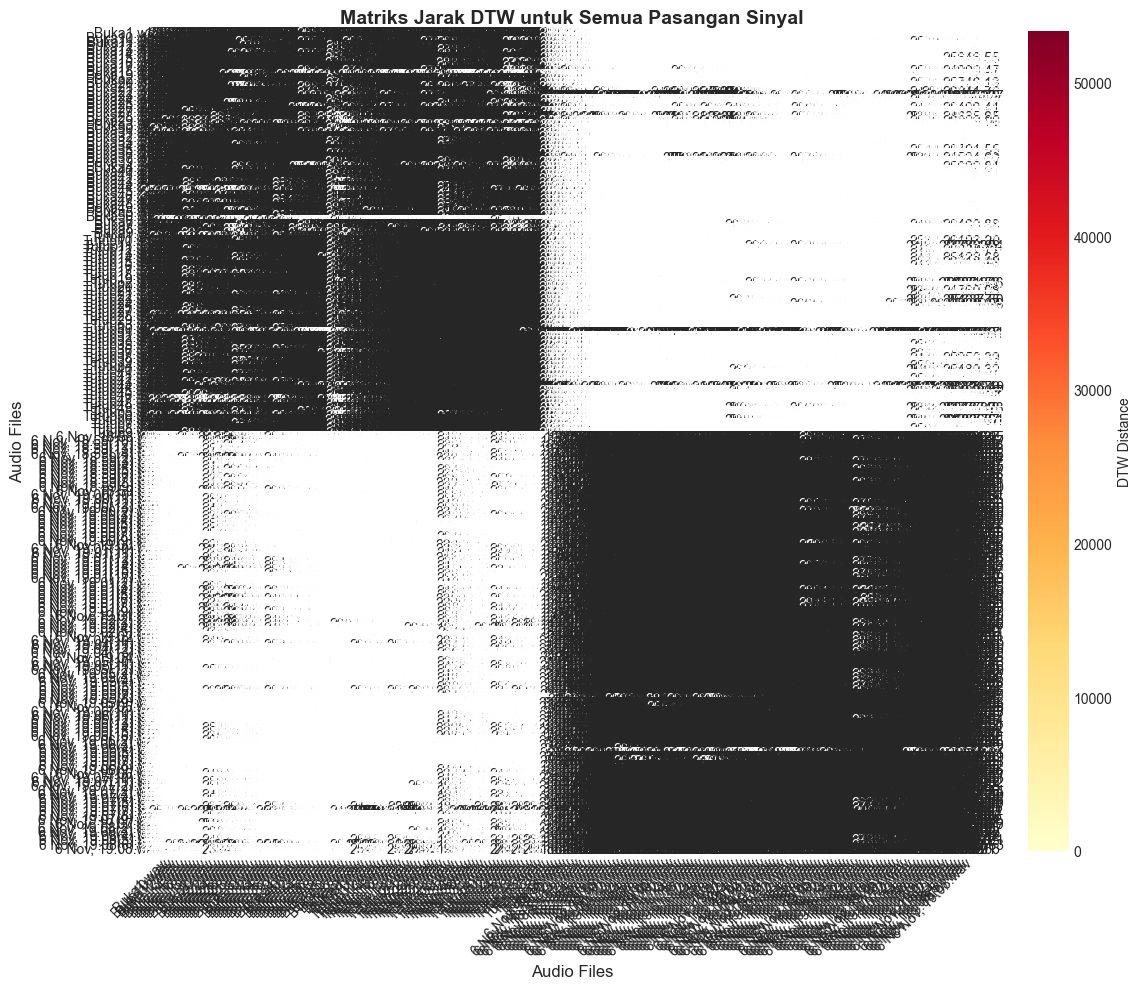

✓ Visualisasi matriks jarak DTW selesai!


In [31]:
# Visualisasi matriks jarak DTW
plt.figure(figsize=(12, 10))
sns.heatmap(dtw_matrix, annot=True, fmt='.2f', cmap='YlOrRd', 
            xticklabels=audio_files, yticklabels=audio_files,
            cbar_kws={'label': 'DTW Distance'}, linewidths=0.5)
plt.title('Matriks Jarak DTW untuk Semua Pasangan Sinyal', fontweight='bold', fontsize=14)
plt.xlabel('Audio Files', fontsize=12)
plt.ylabel('Audio Files', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('07_dtw_distance_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Visualisasi matriks jarak DTW selesai!")

## 13. Ringkasan Hasil Analisis

In [32]:
# Buat ringkasan hasil
print("\n" + "="*80)
print("RINGKASAN ANALISIS DTW")
print("="*80)
print(f"\n1. Dataset Information:")
print(f"   - Total audio files: {n_signals}")
print(f"   - MFCC coefficients: {n_mfcc}")
print(f"\n2. Signal Lengths:")
for i, (name, mfcc) in enumerate(zip(audio_files, mfcc_features)):
    print(f"   - {name}: {mfcc.shape[0]} frames")

print(f"\n3. DTW Analysis (Detail untuk pasangan pertama):")
print(f"   - Signal 1: {name1}")
print(f"   - Signal 2: {name2}")
print(f"   - DTW Distance: {dtw_distance:.4f}")
print(f"   - Optimal path length: {len(path)} steps")
print(f"   - Distance matrix shape: {distance_matrix.shape}")
print(f"   - Accumulated cost: {accumulated_cost[-1, -1]:.4f}")

print(f"\n4. DTW Distance Matrix Statistics:")
# Ambil upper triangle tanpa diagonal
upper_triangle = dtw_matrix[np.triu_indices_from(dtw_matrix, k=1)]
if len(upper_triangle) > 0:
    print(f"   - Minimum distance: {upper_triangle.min():.4f}")
    print(f"   - Maximum distance: {upper_triangle.max():.4f}")
    print(f"   - Average distance: {upper_triangle.mean():.4f}")
    print(f"   - Std deviation: {upper_triangle.std():.4f}")

print(f"\n5. Generated Visualizations:")
print("   ✓ 01_audio_signals.png - Sinyal audio")
print("   ✓ 02_mfcc_features.png - Fitur MFCC")
print("   ✓ 03_distance_matrix.png - Matriks jarak M")
print("   ✓ 04_accumulated_cost_matrix.png - Matriks kumulatif C")
print("   ✓ 05_dtw_optimal_path.png - Jalur optimal DTW")
print("   ✓ 06_signal_alignment.png - Alignment sinyal")
print("   ✓ 07_dtw_distance_matrix.png - Matriks jarak semua pasangan")

print("\n" + "="*80)
print("ANALISIS SELESAI!")
print("="*80)


RINGKASAN ANALISIS DTW

1. Dataset Information:
   - Total audio files: 197
   - MFCC coefficients: 13

2. Signal Lengths:
   - Buka1.wav: 224 frames
   - Buka10.wav: 201 frames
   - Buka11.wav: 278 frames
   - Buka12.wav: 252 frames
   - Buka13.wav: 241 frames
   - Buka14.wav: 263 frames
   - Buka15.wav: 241 frames
   - Buka16.wav: 293 frames
   - Buka17.wav: 226 frames
   - Buka18.wav: 256 frames
   - Buka19.wav: 297 frames
   - Buka2.wav: 261 frames
   - Buka20.wav: 231 frames
   - Buka21.wav: 254 frames
   - Buka22.wav: 226 frames
   - Buka23.wav: 241 frames
   - Buka24.wav: 252 frames
   - Buka25.wav: 289 frames
   - Buka26.wav: 246 frames
   - Buka27.wav: 220 frames
   - Buka28.wav: 256 frames
   - Buka29.wav: 212 frames
   - Buka3.wav: 267 frames
   - Buka30.wav: 233 frames
   - Buka31.wav: 286 frames
   - Buka32.wav: 248 frames
   - Buka33.wav: 250 frames
   - Buka34.wav: 263 frames
   - Buka35.wav: 199 frames
   - Buka36.wav: 214 frames
   - Buka37.wav: 220 frames
   - Buka39

## 14. Export Hasil ke CSV

In [33]:
# Export informasi sinyal
signal_info.to_csv('signal_info.csv', index=False)
print("✓ Saved: signal_info.csv")

# Export DTW distance matrix
dtw_df = pd.DataFrame(dtw_matrix, columns=audio_files, index=audio_files)
dtw_df.to_csv('dtw_distance_matrix.csv')
print("✓ Saved: dtw_distance_matrix.csv")

# Export path coordinates
path_df = pd.DataFrame(path, columns=['Signal1_Frame', 'Signal2_Frame'])
path_df.to_csv('dtw_optimal_path.csv', index=False)
print("✓ Saved: dtw_optimal_path.csv")

print("\n✓ All results exported successfully!")

✓ Saved: signal_info.csv
✓ Saved: dtw_distance_matrix.csv
✓ Saved: dtw_optimal_path.csv

✓ All results exported successfully!
